In [35]:
# Technique: Create 'Avg_Grade' and 'Total_Approved'
# Justification: Semester-specific data (e.g., grades, approved units) lacks holistic insight; engineered features aggregate performance, improving dropout trend detection.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os
from sklearn.preprocessing import StandardScaler

In [36]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
# Define paths and create directories
data_path = '/content/drive/My Drive/rawDataset.csv'
results_path = '/content/drive/My Drive/results/'
eda_vis_path = results_path + 'eda_visualizations/'
os.makedirs(eda_vis_path, exist_ok=True)

In [38]:
# Load dataset
columns = ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance',
           'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification",
           "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced',
           'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
           'Age at enrollment', 'International', 'Curricular units 1st sem (credited)',
           'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)',
           'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',
           'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)',
           'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)',
           'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)',
           'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Target']
df = pd.read_csv(data_path, sep=';', names=columns, header=0)

In [40]:
# Scaling
numerical_cols = df.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("Scaled Stats (Admission grade):\n", df['Admission grade'].describe())

Scaled Stats (Admission grade):
 count    4.424000e+03
mean    -1.847026e-17
std      1.000113e+00
min     -2.208378e+00
25%     -6.269262e-01
50%     -6.064208e-02
75%      5.401715e-01
max      4.352230e+00
Name: Admission grade, dtype: float64


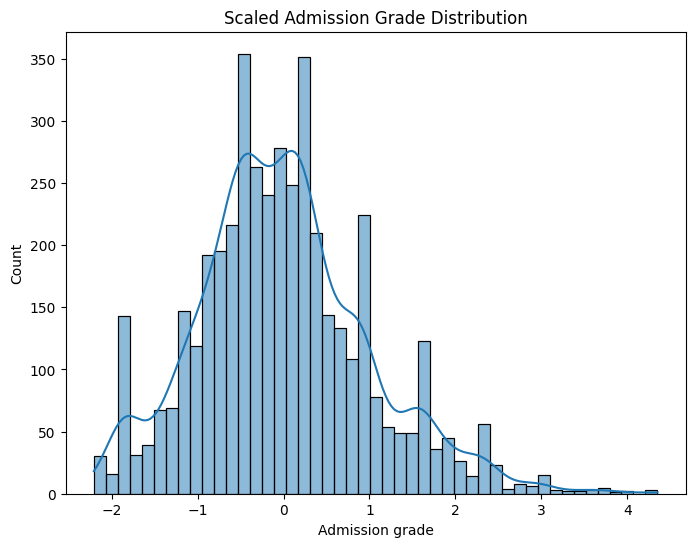

In [41]:
# EDA Visualization: Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['Admission grade'], kde=True)
plt.title("Scaled Admission Grade Distribution")
plt.savefig(eda_vis_path + 'member4_admission_hist.png')
plt.show()

**Interpretation**

The histogram shows a standardized distribution (mean ~ 0, std ~ 1), ensuring fair feature weighting for dropout prediction models.